# 14 - QAOA Benchmark

This notebook will provide an overview of QAOA Benchmarks.

## Create a problem instance
We begin by creating a problem instance for a simple `MaximumCut` problem for a random graph created using the `random_instance` method of the class.

In [1]:
from openqaoa.problems import MaximumCut

# Use the MinimumVertexCover class to instantiate the problem, and get the QUBO representation of the problem
prob = MaximumCut.random_instance(n_nodes=7, edge_probability=0.9, seed=10)
qubo = prob.qubo

## Create a QAOA object with the device to benchmark

Then, we create the `QAOA` object with the device that we want to benchmark

In [2]:
qpu_credentials ={
    "hub": "ibm-q",
    "group": "open", 
    "project": "main"
}

In [3]:
from openqaoa import QAOA, create_device

# create the QAOA object
q = QAOA()

# set device and backend properties
qiskit_cloud = create_device(location='ibmq', name='ibm_oslo', **qpu_credentials, as_emulator=True)
q.set_device(qiskit_cloud)
q.set_backend_properties(n_shots=1000)

# set properties
q.set_circuit_properties(p=1, param_type='standard')

# compile with the problem
q.compile(qubo)

In the code above, one can see that the `.set_classical_optimizer` method has not been used. This is because the benchmark process does not use the optimization loop.

## Benchmark

Now, we create the benchmark object. This object has different methods that will allow us to benchmark the corresponding device and to plot the values taken.

In [4]:
from openqaoa import QAOABenchmark

# create the QAOABenchmark object, passing the QAOA object to benchmark as an argument
benchmark = QAOABenchmark(q)

When initializing the object two attributes are set: `.qaoa` and `.reference`.
- `.qaoa` will be the QAOA object passed, the object to be benchmarked.
- `.reference` will be a QAOA object with the same circuit properties as `.qaoa` but with an `analytical_simulator` backend. It will also be compiled with the same problem. This object will be the reference for the `.qaoa` object to be compared with.

In [5]:
print('.qaoa:', type(benchmark.qaoa), ',\t\t .qaoa.backend:', type(benchmark.qaoa.backend))
print('.reference:', type(benchmark.reference), ',\t .reference.backend:', type(benchmark.reference.backend))

.qaoa: <class 'openqaoa.algorithms.qaoa.qaoa_workflow.QAOA'> ,		 .qaoa.backend: <class 'openqaoa_qiskit.backends.qaoa_qiskit_qpu.QAOAQiskitQPUBackend'>
.reference: <class 'openqaoa.algorithms.qaoa.qaoa_workflow.QAOA'> ,	 .reference.backend: <class 'openqaoa.backends.qaoa_analytical_sim.QAOABackendAnalyticalSimulator'>


### Run Benchmark

The `.run` method of the `QAOABenchmark` object will run the benchmark. 

It evaluates the QAOA circuit of the benchmarked object for a given number of points and ranges per parameter. <br>
It also evaluates the QAOA circuit of the reference object with the same given points.

It has two required positional arguments: `n_points_axis` and `ranges`. 
- `n_points_axis`: The number of points per axis
- `ranges`: The sweep ranges of the parameters. The expected format is a list of tuples: (min, max) or (value,). One tuple per parameter.

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


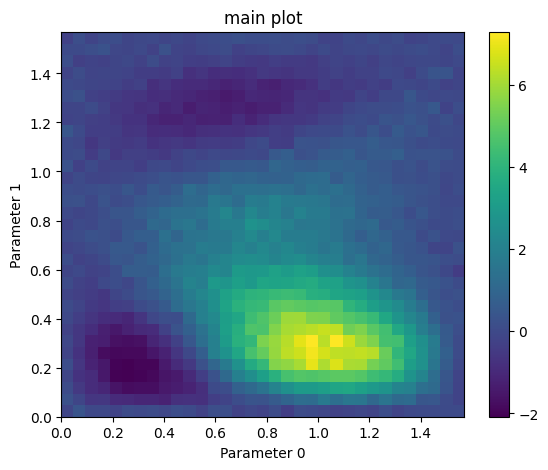

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 05:59:32. 
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


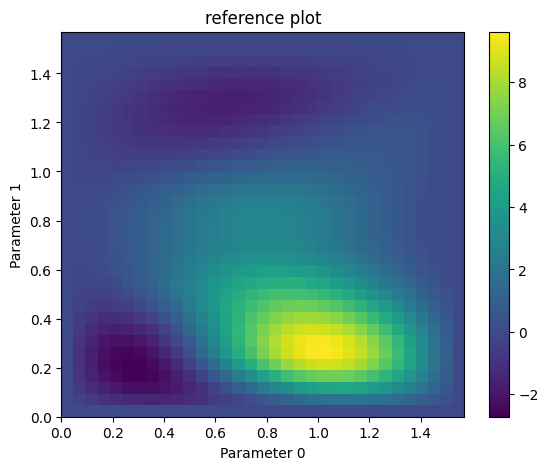

In [6]:
benchmark.run(n_points_axis=2**5+1, ranges=[(0, 3.14/2), (0, 3.14/2)], plot=True, plot_every=100) 
# with plot=True, the plot is shown every `plot_every` evaluated points and at the end of the execution

### Showing results

After running we can plot the results and get the mean difference and the standard deviation of the difference between the benchmarked and the reference:

In [7]:
benchmark.difference_mean

-0.3412911183181846

In [8]:
benchmark.difference_std

0.662073585457232

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values
Plotting the difference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 33 values
	Parameter 1: 0 to 1.57, with 33 values


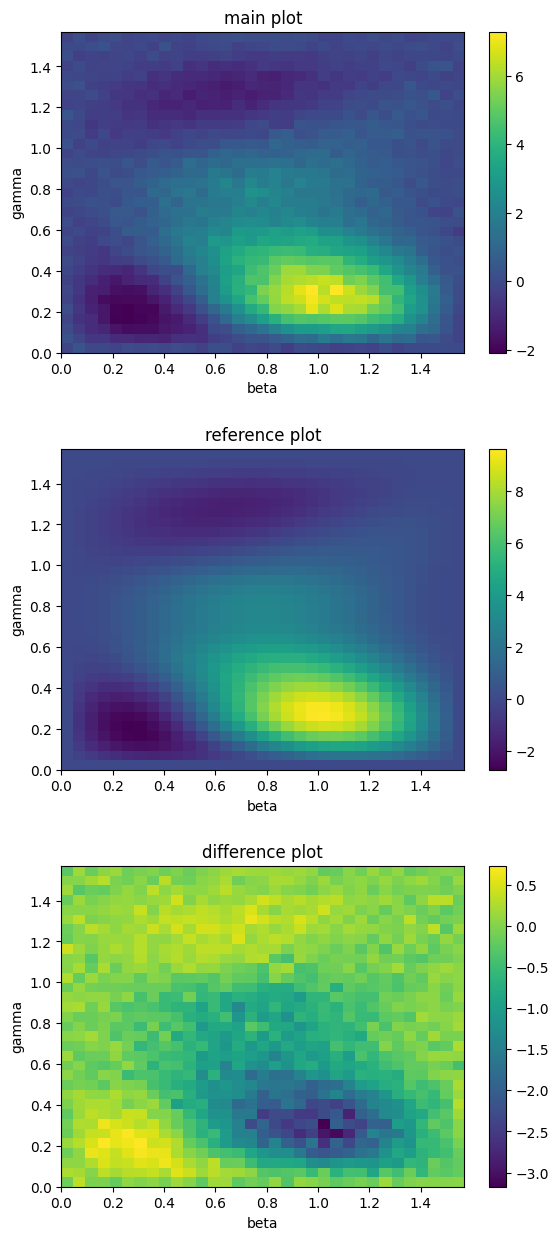

In [9]:
benchmark.plot(main=True, reference=True, difference=True, labels=['beta', 'gamma'])
# with main=True, the plot of the benchmarked points is shown
# with reference=True, the plot of the reference points is shown
# with difference=True, the plot of the difference between the benchmarked and the reference points is shown
# with labels=['beta', 'gamma'], the labels of the axes are set to 'beta' and 'gamma', if not specified, default labels are used

To access the raw data of the benchmark, use the following attributes:

In [10]:
benchmark.values # the values of the benchmarked points

array([[-0.126,  0.344, -0.036, ...,  0.01 ,  0.026,  0.038],
       [ 0.248, -0.126, -0.612, ...,  0.476,  0.074, -0.186],
       [ 0.076, -0.538, -0.886, ...,  1.168,  0.342, -0.2  ],
       ...,
       [ 0.16 , -0.306, -0.202, ..., -0.052, -0.12 , -0.024],
       [ 0.026,  0.01 ,  0.162, ..., -0.002, -0.146,  0.12 ],
       [-0.272,  0.154, -0.168, ..., -0.026,  0.014, -0.014]])

In [11]:
benchmark.values_reference # the values of the reference points

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.30596324e-01, -6.36201769e-01, ...,
         6.90397010e-01,  3.48489595e-01,  5.50253502e-03],
       [ 0.00000000e+00, -6.07268558e-01, -1.14705888e+00, ...,
         1.33292239e+00,  6.62233861e-01,  1.02865946e-02],
       ...,
       [ 0.00000000e+00, -1.32919377e-02, -3.59491490e-02, ...,
        -3.36256986e-03,  3.38913220e-03,  1.35164298e-04],
       [ 0.00000000e+00, -2.52121083e-03, -7.71505865e-03, ...,
        -3.32741998e-03, -2.75178585e-04,  1.81992750e-05],
       [ 0.00000000e+00, -3.69897000e-07, -1.45593300e-06, ...,
        -1.46058600e-06, -3.72279000e-07, -1.90000000e-11]])

In [12]:
benchmark.difference # the difference between the benchmarked and the reference points

array([[-0.126     ,  0.344     , -0.036     , ...,  0.01      ,
         0.026     ,  0.038     ],
       [ 0.248     ,  0.20459632,  0.02420177, ..., -0.21439701,
        -0.27448959, -0.19150254],
       [ 0.076     ,  0.06926856,  0.26105888, ..., -0.16492239,
        -0.32023386, -0.21028659],
       ...,
       [ 0.16      , -0.29270806, -0.16605085, ..., -0.04863743,
        -0.12338913, -0.02413516],
       [ 0.026     ,  0.01252121,  0.16971506, ...,  0.00132742,
        -0.14572482,  0.1199818 ],
       [-0.272     ,  0.15400037, -0.16799854, ..., -0.02599854,
         0.01400037, -0.014     ]])

### Run 1D Benchmark

One can also run the benchmark fixing the value of any parameter:

In [13]:
benchmark.run(n_points_axis=100, ranges=[(0, 3.14/2), (1,)])
# in this case the first parameter is swept from 0 to 3.14/2, while the second is fixed to 1

Running benchmark.
Point 100 out of 100. Expected remaining time to complete: 00:00:00, it will be finished at 05:59:45. 
Running reference.
Point 100 out of 100. Expected remaining time to complete: 00:00:00, it will be finished at 05:59:45. 


Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57, with 100 values
	Parameter 1: 1
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 100 values
	Parameter 1: 1
Plotting the difference plot with the following parameters:
	Parameter 0: 0 to 1.57, with 100 values
	Parameter 1: 1


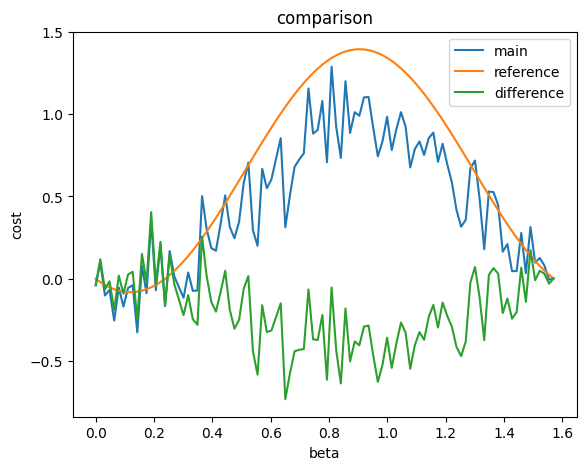

In [14]:
benchmark.plot(main=True, reference=True, difference=True, labels=['beta', 'cost'], title="comparison", one_plot=True)
# with one_plot=True, the three plots are shown in the same figure

## Benchmark with different circuit properties

The same procedure can be applied to an object with circuit properties that are not the standard ones, for example: p=2 and param_type='extended'.

However, for this properties the `analytical_simulator` backend is not available, so the `vectorized` backend is used instead for the reference.

In [15]:
# create the QAOA object
q2 = QAOA()

# set device and backend properties
q2.set_device(qiskit_cloud)
q2.set_backend_properties(n_shots=1000)

# set properties
q2.set_circuit_properties(p=2, param_type='extended')

# compile with the problem
q2.compile(MaximumCut.random_instance(n_nodes=3, edge_probability=0.9, seed=10).qubo) #use a smaller problem to speed up the example

In [16]:
# create the new QAOABenchmark object, in this case the reference will use the vectorized simulator not the analytical one
benchmark2 = QAOABenchmark(q2)

In [17]:
benchmark2.run(n_points_axis=2**5+1, ranges=[(1,), (1,), (1,), (0, 3.14), (1,), (1,), (-3.14, 3.14), (1,), (1,), (1,), (1,), (1,)]) 
# see that the ranges are now 12-dimensional, one tuple is needed for each parameter. 
# in this case, we are fixing 10 parameters, and sweeping the other two
# one can sweep more than 

Running benchmark.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 06:00:59. 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 06:01:00. 


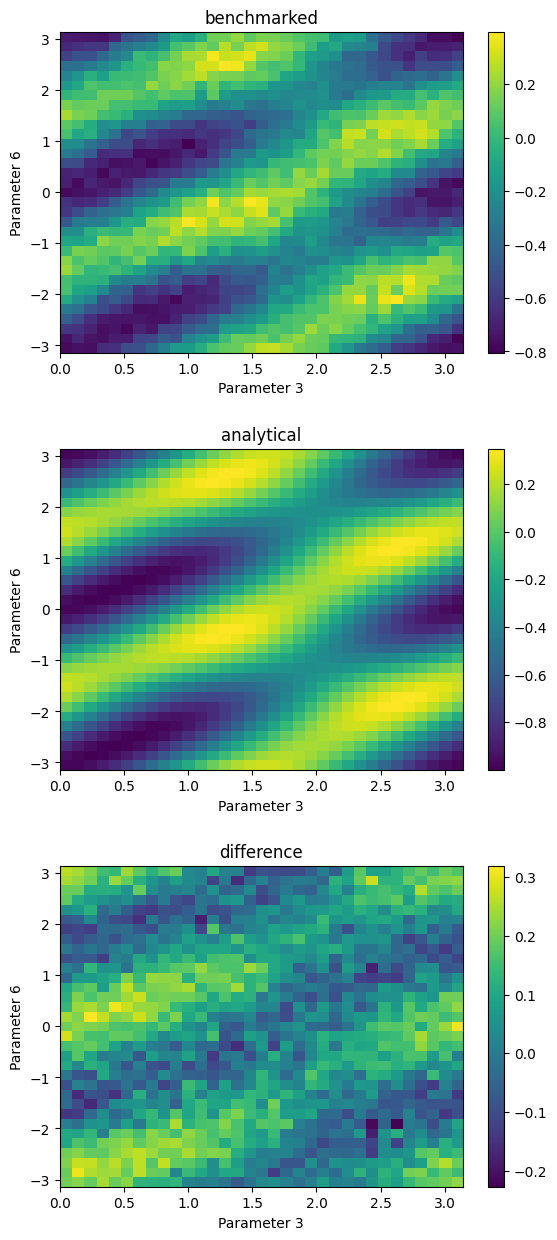

In [18]:
benchmark2.plot(main=True, reference=True, difference=True, verbose=False, title=['benchmarked', 'analytical', 'difference']) 